In [7]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc #한글지원
import platform
import seaborn as sns
plt.rc("font",family='Malgun Gothic') #한글_글꼴
plt.rcParams['axes.unicode_minus'] = False #음수표시

In [8]:
df_train = pd.read_csv('./data/train_duplicated.csv')
df_ttf = pd.read_csv('./data/01_M02_DC_train_ttf.csv')
df_fault = pd.read_csv('./data/01_M02_train_fault_data.csv')

In [5]:
def find_neighbours(value, df, colname):
    exactmatch = df[df[colname] == value]
    if not exactmatch.empty:
        return exactmatch.index[0]
    else:
        upperneighbour_ind = df[df[colname] > value][colname].idxmin()
        return  upperneighbour_ind

In [6]:
df_train['recipe'].unique()

array([67, 68, 66, 73, 69, 71, 72, 70, 74, 76, 77, 75], dtype=int64)

In [8]:
df_train[df_train['Lot'] == 9289].describe() #불량

,time,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,ETCHSUPPRESSORVOLTAGE,...,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION
count,3.521300e+04,35213.0,35213.0,3.521300e+04,35213.0,35213.000000,35213.000000,35213.000000,35213.000000,35213.000000,...,35213.000000,35213.000000,35213.000000,3.521300e+04,35213.000000,35211.000000,35213.000000,35213.000000,35213.000000,35213.000000
mean,7.442607e+06,1.0,9289.0,1.076891e+07,67.0,32.479596,-0.017714,0.070353,0.138161,0.064171,...,-0.095899,-0.499463,0.119038,-1.946265e-02,0.963756,0.681094,0.192983,0.407604,0.614477,0.145653
std,7.541765e+05,0.0,0.0,4.989976e+04,0.0,10.928525,0.040522,0.944117,1.006218,0.928750,...,1.235728,1.398103,0.899751,4.792151e-01,2.334507,0.521941,0.396392,0.443562,0.460918,0.901522
min,5.938094e+06,1.0,9289.0,1.067032e+07,67.0,1.000000,-0.079613,-0.960136,-0.967454,-0.948716,...,-1.756665,-2.801562,-1.315014,-3.672767e+01,-0.122473,0.000000,-1.536771,-1.527970,-1.397868,-0.761438
25%,6.946850e+06,1.0,9289.0,1.073575e+07,67.0,27.000000,-0.079060,-0.958189,-0.958871,-0.946148,...,-1.747158,-2.785440,0.022131,-1.320719e-02,-0.122455,0.000000,-0.030061,0.158021,0.354929,-0.304990
50%,7.330630e+06,1.0,9289.0,1.076090e+07,67.0,34.000000,0.003771,0.472938,0.539109,0.493902,...,-0.056795,0.353066,0.022131,-1.320719e-02,-0.122446,1.000000,0.221089,0.439054,0.647098,0.021044
75%,8.075084e+06,1.0,9289.0,1.081082e+07,67.0,42.000000,0.011619,0.711922,1.310124,0.638318,...,1.407137,0.358499,0.022131,-1.320719e-02,-0.122437,1.000000,0.524087,0.778080,0.999558,0.803526
max,8.552178e+06,1.0,9289.0,1.084207e+07,67.0,53.000000,0.030835,1.548592,2.115240,1.648602,...,1.459925,0.739816,2.027848,-6.521799e-15,7.467053,3.000000,0.610938,0.875407,1.100742,4.037785


In [9]:
df_train[df_train['Lot'] == 9212].describe() #정상

,time,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,ETCHSUPPRESSORVOLTAGE,...,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION
count,4.016400e+04,40164.0,40164.0,4.016400e+04,40164.0,40164.000000,40164.000000,40164.000000,40164.000000,40164.000000,...,40164.000000,40164.000000,40164.000000,4.016400e+04,40164.000000,40164.000000,40164.000000,40164.000000,40164.000000,40164.000000
mean,6.791950e+06,1.0,9212.0,1.072764e+07,67.0,32.902724,-0.001522,0.337105,0.420281,0.328195,...,0.326658,0.092198,-0.050130,-1.320719e-02,0.296998,0.858879,-0.189944,-0.020867,0.168953,0.242699
std,9.957004e+05,0.0,0.0,6.369656e+04,0.0,11.614518,0.028565,0.883070,0.938420,0.869343,...,1.007472,0.869522,0.784940,4.258799e-15,1.958754,0.432482,0.532916,0.596336,0.619966,0.910396
min,5.494678e+06,1.0,9212.0,1.065062e+07,67.0,1.000000,-0.079527,-0.960136,-0.960573,-0.948716,...,-1.756665,-2.794728,-1.315014,-1.320719e-02,-0.122464,0.000000,-0.927725,-0.846439,-0.689332,-0.683190
25%,5.793263e+06,1.0,9212.0,1.066500e+07,67.0,27.000000,-0.009169,-0.944425,-0.958445,-0.945965,...,-0.060052,0.350789,-0.646442,-1.320719e-02,-0.122446,1.000000,-0.740713,-0.637176,-0.471777,-0.304990
50%,6.564218e+06,1.0,9212.0,1.070907e+07,67.0,35.000000,0.007118,0.711126,0.783109,0.637816,...,-0.051796,0.355169,0.022131,-1.320719e-02,-0.122446,1.000000,-0.287371,-0.129902,0.055597,0.021044
75%,7.835839e+06,1.0,9212.0,1.079587e+07,67.0,43.000000,0.019089,1.188186,1.372258,1.069921,...,1.410382,0.359727,0.022131,-1.320719e-02,-0.122437,1.000000,0.456642,0.702614,0.921102,0.803526
max,8.661378e+06,1.0,9212.0,1.084860e+07,67.0,54.000000,0.030215,1.549114,1.535185,1.648602,...,2.179004,0.717386,2.027848,-1.320719e-02,9.443969,3.000000,0.681042,0.953857,1.182300,4.037785


In [10]:
for val, val2 in zip(df_fault['fault_name'].unique(), ['pb', 'ph', 'fl']):
    temp = df_fault[df_fault['fault_name']==val]
    globals()['{}_index'.format(val2)] = []

    for fault in temp.time:
        globals()['{}_index'.format(val2)].append(find_neighbours(fault, dt_train, 'time'))
        

NameError: name 'dt_train' is not defined

In [ ]:
df_train[df_train['recipe']==67]['FIXTURESHUTTERPOSITION'].value_counts()

FIXTURESHUTTERPOSITION
1.0      2130244
0.0       543433
2.0        21856
3.0        21162
255.0        103
Name: count, dtype: int64

In [11]:
df_train[df_train['recipe']!=67]['FIXTURESHUTTERPOSITION'].value_counts()

1.0      1970993
0.0       406802
3.0         8490
2.0         7195
255.0         32
Name: FIXTURESHUTTERPOSITION, dtype: int64

In [12]:
np.zeros(3)

array([0., 0., 0.])

In [ ]:
# recipe별로 False확인

recipe_df = pd.DataFrame([np.zeros(3)], columns=['num', 'True', 'False'])
i = 0

for rec in df_pb['recipe'].unique():
    temp = df_pb[df_pb['recipe'] == rec]
    temp2 = temp['fault'].value_counts()
    try:
        recipe_df.loc[i] = [rec, temp2[0], temp2[1]]
    except:
        recipe_df.loc[i] = [rec, temp2[0], 0]
    i += 1
    
recipe_df

In [ ]:
# stage별로 False확인

stage_df = pd.DataFrame([np.zeros(3)], columns=['num', 'True', 'False'])
i = 0

for rec in df_pb['stage'].unique():
    temp = df_pb[df_pb['stage'] == rec]
    temp2 = temp['fault'].value_counts()
    try:
        stage_df.loc[i] = [rec, temp2[0], temp2[1]]
    except:
        stage_df.loc[i] = [rec, temp2[0], 0]
    i += 1
    
stage_df

# pb

In [ ]:
df_pb = pd.merge(left=df_train, right=df_ttf_pb, how="left", left_on="time", right_on="time")
df_pb = df_pb.dropna()

df_pb['fault'] = 0 #정상
df_pb.iloc[pb_index, -1] = 1 #비정상

In [ ]:
df_pb['fault'].value_counts()

fault
0    4637892
1         53
Name: count, dtype: int64

In [ ]:
df_pb_1 = df_pb[(df_pb['FIXTURESHUTTERPOSITION'] == 1) & (df_pb['recipe'] == 67) & (df_pb['stage'] == 1)]
df_pb_2 = df_pb[(df_pb['FIXTURESHUTTERPOSITION'] == 1) & (df_pb['recipe'] != 67) & (df_pb['stage'] != 1)]

In [ ]:
# fault개수
print('전체 : ', df_pb['fault'].value_counts())
print('-'*30)
print('shutter=1 / recipe=67', df_pb_1['fault'].value_counts())
print('-'*30)
print('shutter=1 / recipe!=67', df_pb_2['fault'].value_counts())

전체 :  fault
0    4637892
1         53
Name: count, dtype: int64
------------------------------
shutter=1 / recipe=67 fault
0    1943749
1         19
Name: count, dtype: int64
------------------------------
shutter=1 / recipe!=67 fault
0    609026
1         7
Name: count, dtype: int64


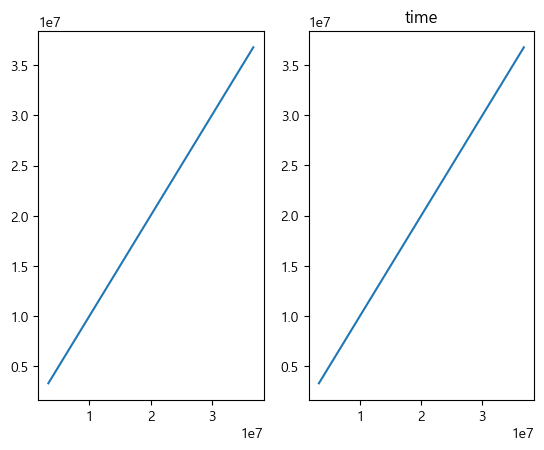

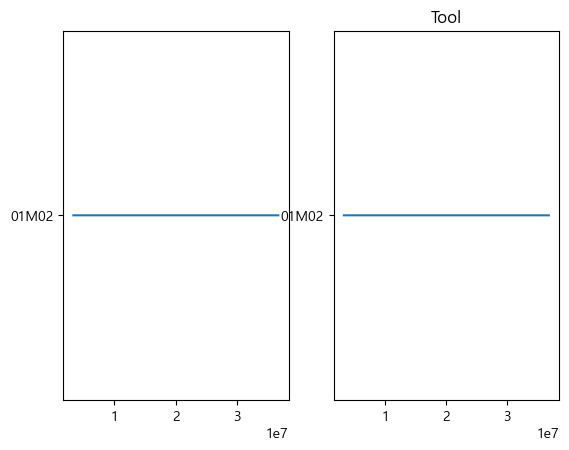

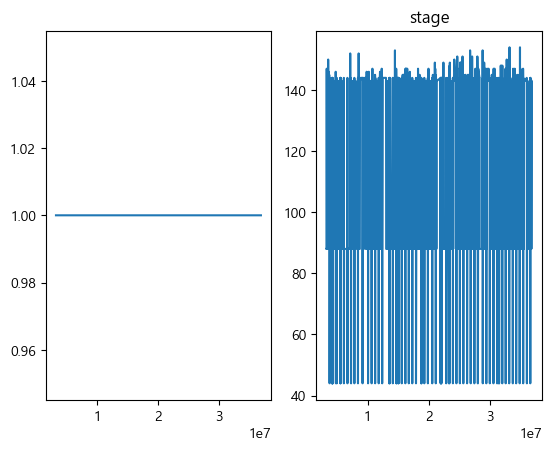

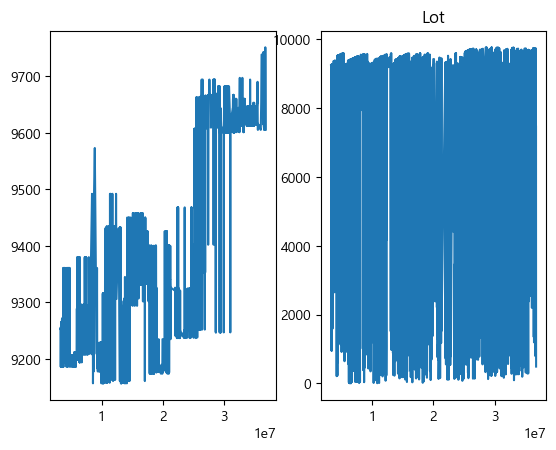

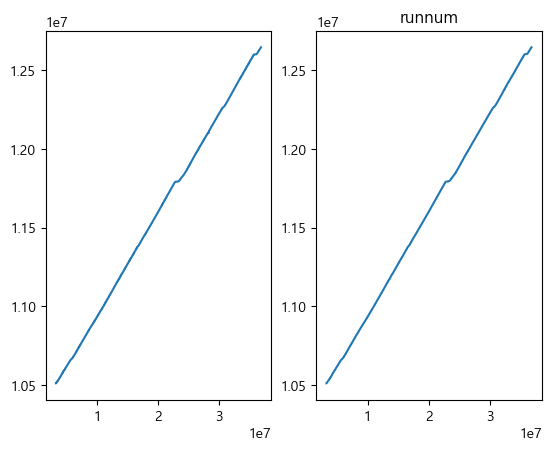

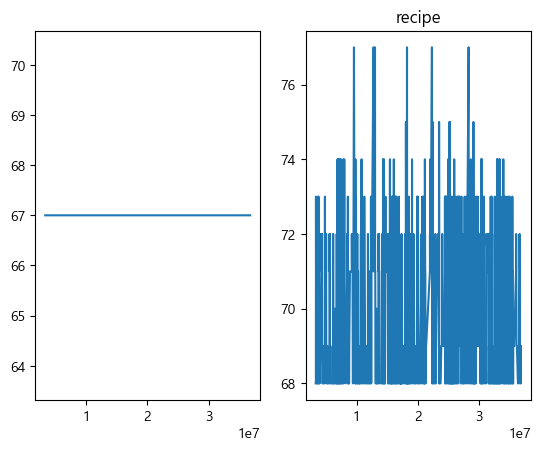

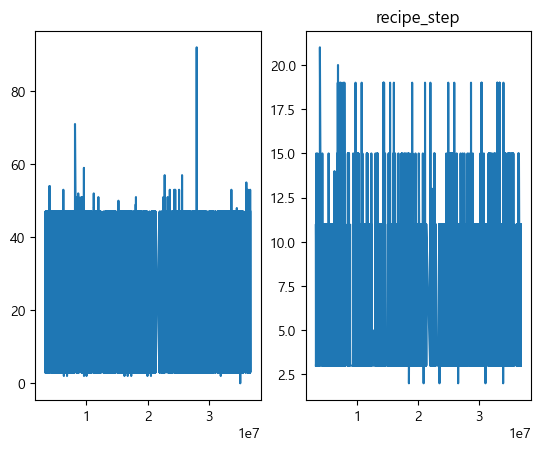

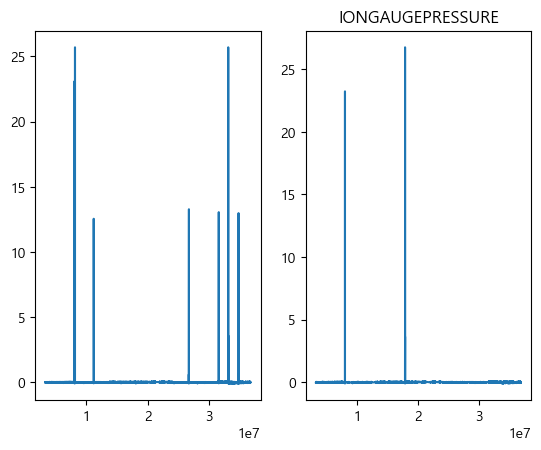

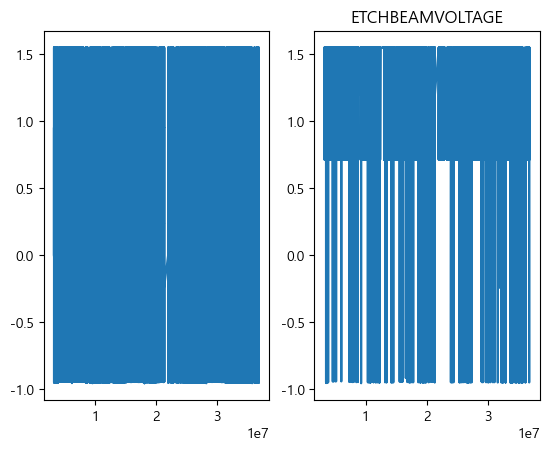

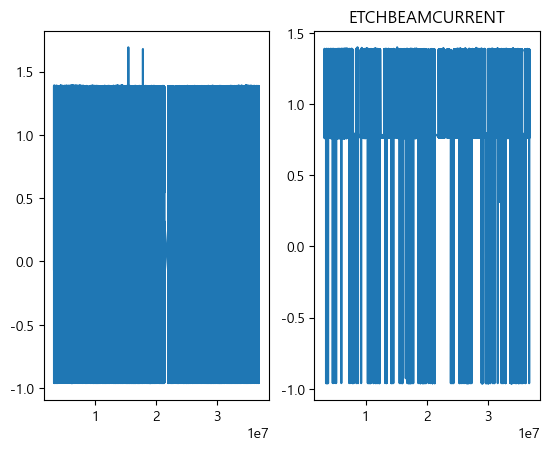

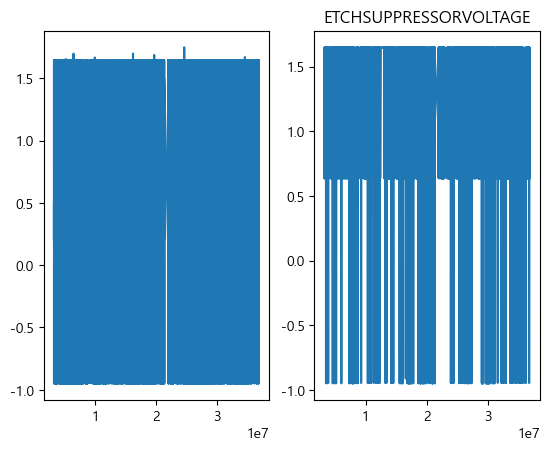

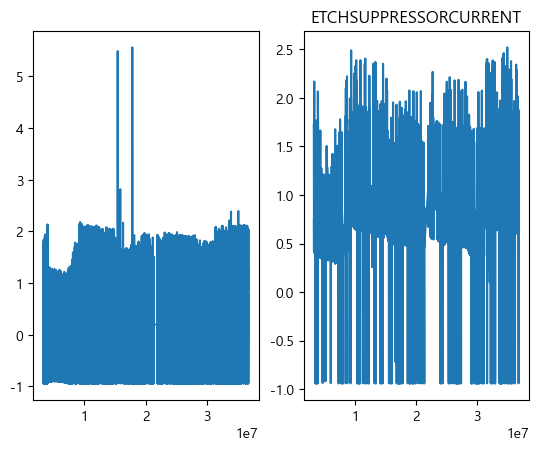

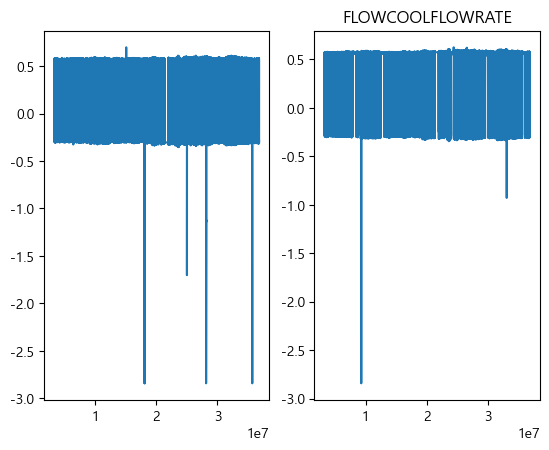

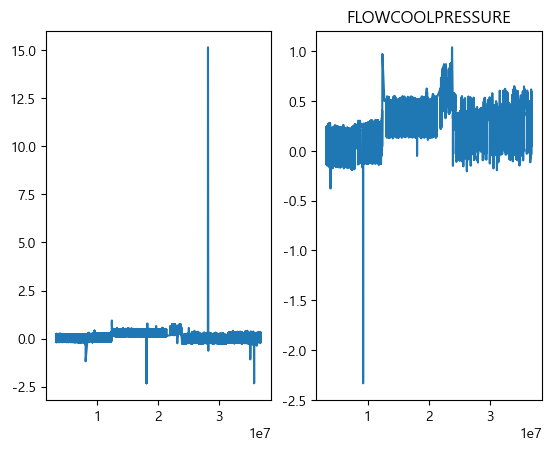

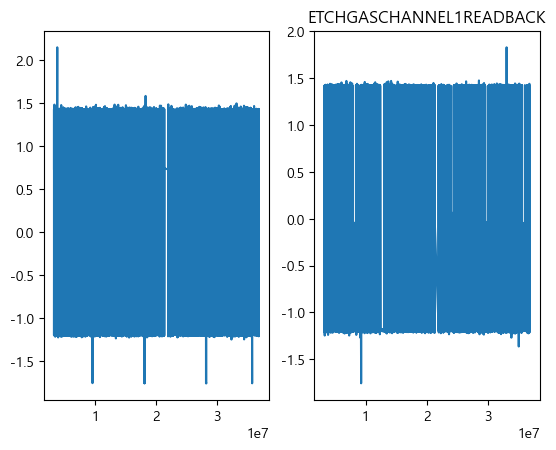

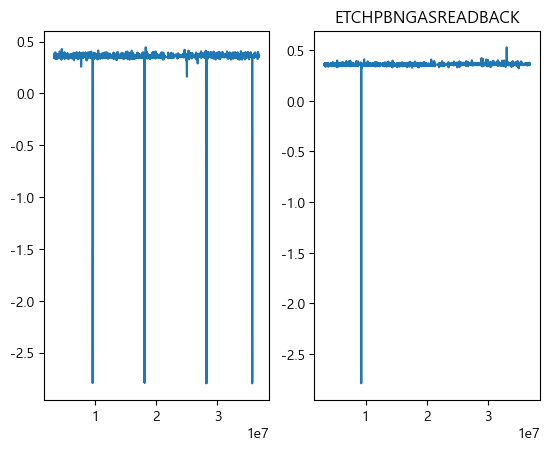

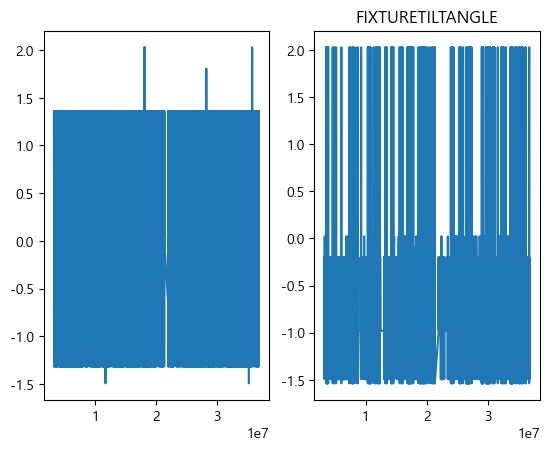

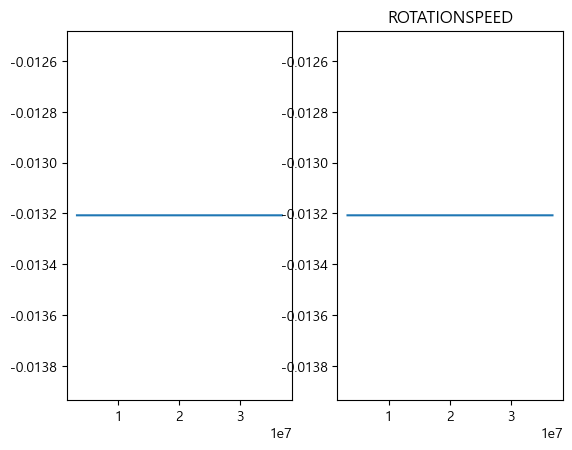

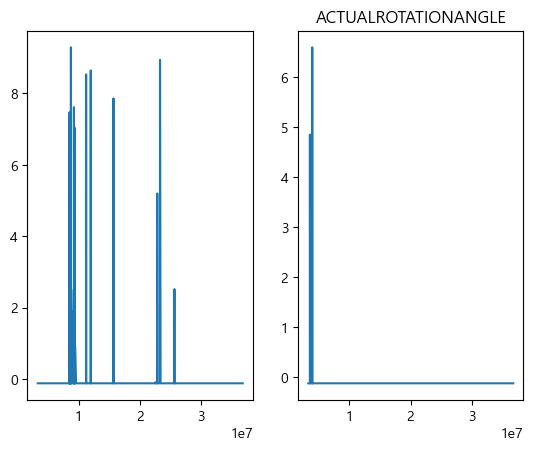

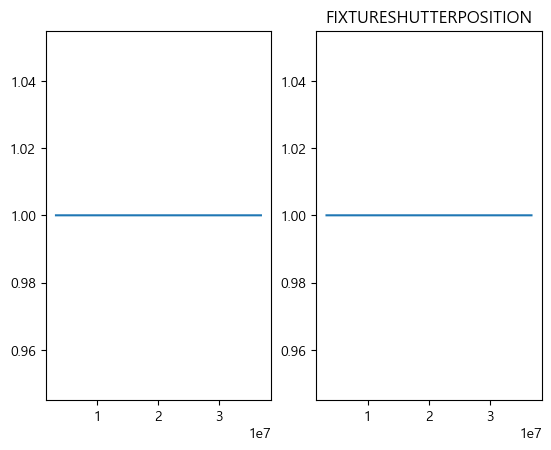

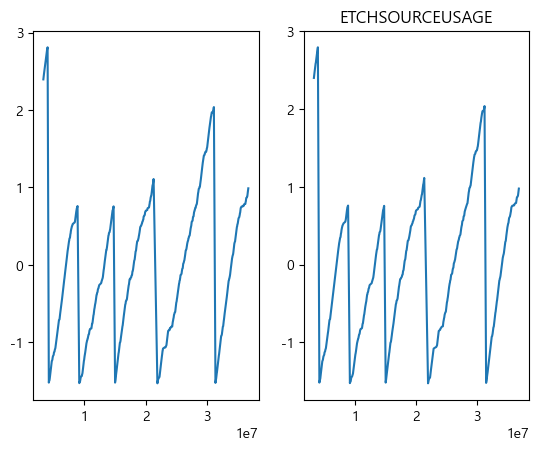

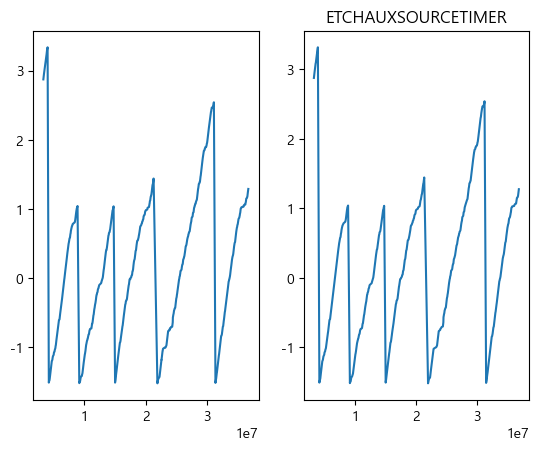

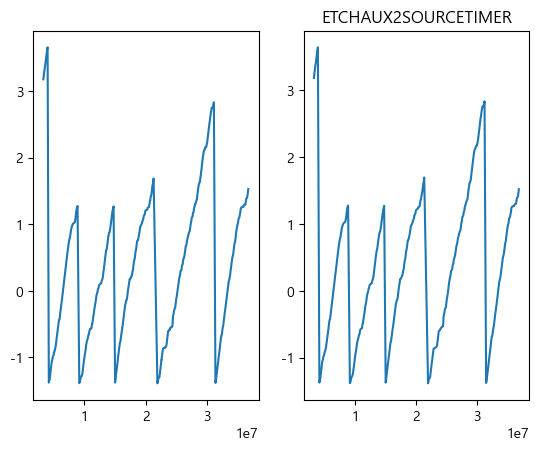

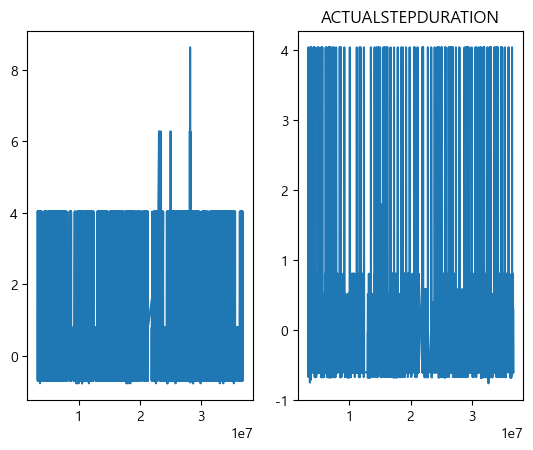

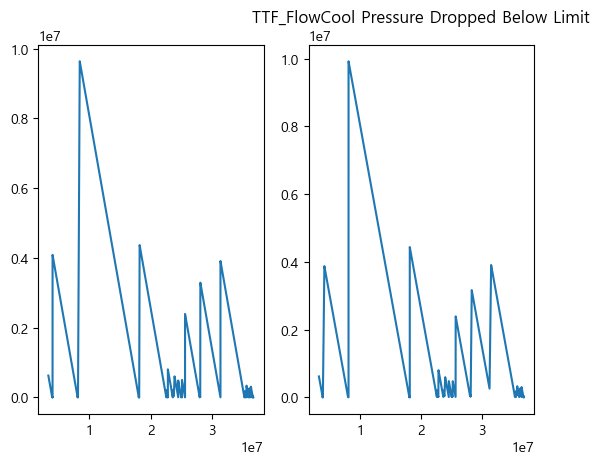

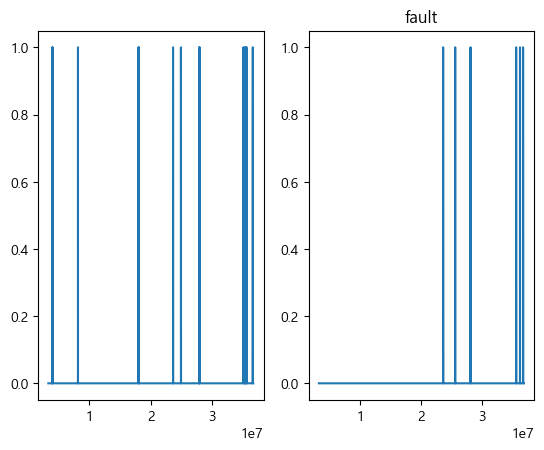

In [ ]:
for col in df_pb_1.columns:
    plt.subplot(1,2,1)
    plt.plot(df_pb_1['time'], df_pb_1[col])
    plt.subplot(1,2,2)
    plt.plot(df_pb_2['time'], df_pb_2[col])
    plt.title(col)
    plt.show()

In [ ]:
df_pb_1[df_pb_1['time'].diff() != 4]

,time,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,fault
49,3284030,01M02,1,9253,10511673,67,3,-0.000342,-0.005718,-0.061104,...,0.347284,-0.646442,-0.013207,-0.122437,1.0,2.395414,2.871561,3.175993,4.037785,0
89,3284190,01M02,1,9253,10511673,67,7,-0.000342,0.233269,0.247087,...,0.350789,-0.646442,-0.013207,-0.122437,1.0,2.395545,2.871711,3.176149,-0.604941,0
115,3284294,01M02,1,9253,10511673,67,11,0.008099,0.471742,0.542159,...,0.352016,-0.646442,-0.013207,-0.122437,1.0,2.395632,2.871807,3.176249,-0.683190,0
139,3284390,01M02,1,9253,10511673,67,15,0.008099,0.710216,0.543293,...,0.355169,-0.646442,-0.013207,-0.122437,1.0,2.395712,2.871895,3.176340,-0.683190,0
167,3284502,01M02,1,9253,10511673,67,19,0.012651,0.949314,0.989519,...,0.348512,-0.646442,-0.013207,-0.122437,1.0,2.395807,2.871998,3.176448,-0.683190,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5110100,39788976,01M02,1,9978,12838177,67,11,0.021903,0.471685,0.543577,...,0.360776,-0.646442,-0.013207,-0.122455,1.0,-0.185416,-0.022485,0.167271,-0.683190,0
5110124,39789072,01M02,1,9978,12838177,67,15,0.021903,0.709930,0.545706,...,0.362004,-0.646442,-0.013207,-0.122455,1.0,-0.185336,-0.022398,0.167361,-0.683190,0
5110151,39789180,01M02,1,9978,12838177,67,19,0.027171,0.947836,0.984482,...,0.364281,-0.646442,-0.013207,-0.122455,1.0,-0.185246,-0.022296,0.167467,-0.683190,0
5110185,39789316,01M02,1,9978,12838177,67,23,-0.016305,1.545074,0.765023,...,0.362004,-0.980728,-0.013207,-0.122455,1.0,-0.185134,-0.022170,0.167598,-0.657107,0


In [ ]:
df_pb_2[df_pb_2['time'].diff() != 4]

,time,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,fault
1528,3290146,01M02,88,9254,10511673,68,3,-0.006753,1.546334,0.775946,...,0.360776,-0.200727,-0.013207,-0.122455,1.0,2.400114,2.876821,3.181461,-0.604941,0
1755,3291054,01M02,88,9254,10511673,68,7,0.022475,0.710558,1.359064,...,0.358499,-1.493300,-0.013207,-0.122455,1.0,2.400868,2.877663,3.182337,0.336645,0
1916,3291698,01M02,88,9254,10511673,68,11,0.016895,0.710784,1.347363,...,0.350789,-0.200727,-0.013207,-0.122455,1.0,2.401400,2.878260,3.182958,0.018436,0
2015,3292342,01M02,1,9255,10511673,66,3,0.007118,-0.948634,-0.958729,...,0.356222,-0.200727,-0.013207,-0.122446,1.0,2.401535,2.878412,3.183116,-0.667540,0
4541,3303730,01M02,88,9257,10512449,68,3,-0.004676,1.545644,0.770202,...,0.358499,-0.200727,-0.013207,-0.122446,1.0,2.409346,2.887152,3.192201,-0.604941,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5106087,39755488,01M02,1,9954,12836336,66,3,0.021334,-0.948861,-0.959084,...,0.362004,-0.200727,-0.013207,-0.122455,1.0,-0.197882,-0.036427,0.152776,-0.670148,0
5108552,39766368,01M02,88,3356,12836886,68,3,0.005668,1.545858,0.762752,...,0.363231,-0.200727,-0.013207,-0.122455,1.0,-0.190119,-0.027744,0.161804,-0.604941,0
5108777,39767268,01M02,88,3356,12836886,68,7,0.044674,0.710330,1.363321,...,0.365508,-1.493300,-0.013207,-0.122455,1.0,-0.189373,-0.026911,0.162670,0.326212,0
5108932,39767888,01M02,88,3356,12836886,68,11,0.031457,0.711694,1.350553,...,0.365508,-0.200727,-0.013207,-0.122455,1.0,-0.188860,-0.026336,0.163268,-0.010255,0


In [ ]:
df_pb_1.iloc[:, 7:].describe()

,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,ETCHSUPPRESSORVOLTAGE,ETCHSUPPRESSORCURRENT,FLOWCOOLFLOWRATE,FLOWCOOLPRESSURE,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,TTF_FlowCool Pressure Dropped Below Limit,fault
count,1.943768e+06,1.943768e+06,1.943768e+06,1.943768e+06,1.943768e+06,1.943768e+06,1.943768e+06,1.943768e+06,1.943768e+06,1.943768e+06,1.943768e+06,1.943768e+06,1943768.0,1.943768e+06,1.943768e+06,1.943768e+06,1.943768e+06,1.943768e+06,1.943768e+06
mean,6.361612e-03,4.382941e-01,5.351674e-01,4.246131e-01,5.618308e-01,1.797229e-01,1.434592e-01,4.912173e-01,3.581009e-01,-9.926046e-02,-1.320719e-02,-9.217601e-02,1.0,-6.803644e-02,1.276731e-01,3.233793e-01,1.807088e-01,2.445563e+06,9.774829e-06
std,1.056532e-01,8.535081e-01,9.053942e-01,8.368458e-01,9.557024e-01,4.265028e-01,2.637475e-01,8.212102e-01,3.487990e-02,7.159379e-01,6.938896e-17,4.717277e-01,0.0,9.602947e-01,1.085042e+00,1.128037e+00,7.444317e-01,2.235347e+06,3.126458e-03
min,-7.961339e-02,-9.593263e-01,-9.624175e-01,-9.487159e-01,-9.390427e-01,-2.842907e+00,-2.332807e+00,-1.756665e+00,-2.795779e+00,-1.493300e+00,-1.320719e-02,-1.225000e-01,1.0,-1.530295e+00,-1.520720e+00,-1.390331e+00,-7.614378e-01,0.000000e+00,0.000000e+00
25%,-3.423279e-04,-2.440197e-01,-6.089188e-02,2.054331e-01,-1.172628e-01,-2.841996e-01,-1.267077e-01,-5.829872e-02,3.551685e-01,-6.464416e-01,-1.320719e-02,-1.224550e-01,1.0,-8.420590e-01,-7.512264e-01,-5.903465e-01,2.104417e-02,6.909820e+05,0.000000e+00
50%,1.059908e-02,7.107266e-01,7.858058e-01,6.374488e-01,7.141462e-01,5.594391e-01,1.760870e-01,-5.029236e-02,3.597266e-01,2.213076e-02,-1.320719e-02,-1.224460e-01,1.0,-1.486036e-01,3.582640e-02,2.278931e-01,2.104417e-02,1.940840e+06,0.000000e+00
75%,1.964576e-02,1.187958e+00,1.373961e+00,1.069785e+00,1.376722e+00,5.681988e-01,2.603066e-01,1.410382e+00,3.620037e-01,2.213076e-02,-1.320719e-02,-1.224371e-01,1.0,5.349366e-01,8.060276e-01,1.028613e+00,8.035261e-01,3.456710e+06,0.000000e+00
max,2.570267e+01,1.549400e+00,1.692014e+00,1.749785e+00,5.560574e+00,6.980442e-01,1.516387e+01,2.146481e+00,4.441923e-01,2.027848e+00,-1.320719e-02,9.287844e+00,1.0,2.809819e+00,3.335298e+00,3.658105e+00,8.628345e+00,9.638754e+06,1.000000e+00


In [ ]:
df_pb_2.iloc[:, 7:].describe()

,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,ETCHSUPPRESSORVOLTAGE,ETCHSUPPRESSORCURRENT,FLOWCOOLFLOWRATE,FLOWCOOLPRESSURE,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,TTF_FlowCool Pressure Dropped Below Limit,fault
count,609033.000000,609033.000000,609033.000000,609033.000000,609033.000000,609033.000000,609033.000000,609033.000000,609033.000000,609033.000000,6.090330e+05,609033.000000,609033.0,609033.000000,609033.000000,609033.000000,609033.000000,6.090330e+05,609033.000000
mean,0.005374,0.925923,0.690223,0.955264,0.682382,0.320030,0.300424,-0.238134,0.358062,-0.296966,-1.320719e-02,-0.119667,1.0,0.004146,0.209882,0.408845,-0.064021,2.363802e+06,0.000011
std,0.072778,0.860758,0.735569,0.904498,0.808351,0.388260,0.224439,1.129625,0.029735,1.109641,5.204175e-18,0.118050,0.0,0.964045,1.090240,1.133440,0.833634,2.187105e+06,0.003390
min,-0.079613,-0.959213,-0.961070,-0.948716,-0.939043,-2.842907,-2.332807,-1.756665,-2.789997,-1.537872,-1.320719e-02,-0.122518,1.0,-1.525605,-1.515474,-1.384878,-0.761438,0.000000e+00,0.000000
25%,-0.005096,0.710784,0.768569,0.637495,0.501307,-0.280125,0.158097,-1.189708,0.355169,-1.493300,-1.320719e-02,-0.122455,1.0,-0.757658,-0.656140,-0.491492,-0.604941,7.377760e+05,0.000000
50%,0.003304,1.545288,0.772258,1.645209,0.685947,0.565479,0.338733,-1.183203,0.359727,-0.200727,-1.320719e-02,-0.122446,1.0,-0.081666,0.108136,0.303068,-0.448445,1.803208e+06,0.000000
75%,0.021903,1.546381,1.371763,1.645804,1.168353,0.569103,0.495586,1.407137,0.362004,-0.200727,-1.320719e-02,-0.122437,1.0,0.575636,0.845117,1.069252,0.336645,3.250204e+06,0.000000
max,26.737428,1.549685,1.397936,1.648969,2.521029,0.625565,1.036884,1.829721,0.528480,2.027848,-1.320719e-02,6.592265,1.0,2.793666,3.317205,3.639295,4.037785,9.921614e+06,1.000000


In [ ]:
df_pb_2.iloc[:, list(range(7, 15))+ [-3]]

,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,ETCHSUPPRESSORVOLTAGE,ETCHSUPPRESSORCURRENT,FLOWCOOLFLOWRATE,FLOWCOOLPRESSURE,ETCHGASCHANNEL1READBACK,ACTUALSTEPDURATION
1528,-0.006753,1.546334,0.775946,1.645391,0.753337,0.568199,0.236524,-1.189708,-0.604941
1529,-0.006753,1.545644,0.777080,1.646078,0.737179,0.568199,0.236524,-1.196214,-0.604941
1530,-0.006753,1.545811,0.776515,1.645301,0.718954,0.568199,0.236524,-1.186456,-0.604941
1531,-0.006753,1.545930,0.770271,1.645758,0.701080,0.565479,0.236524,-1.181452,-0.604941
1532,-0.006753,1.545858,0.772046,1.645391,0.697636,0.565479,0.236524,-1.189708,-0.604941
...,...,...,...,...,...,...,...,...,...
4636157,0.002377,1.544337,0.769349,1.644978,0.725146,0.566387,0.392745,-1.197965,-0.604941
4636158,0.002377,1.543886,0.777579,1.644704,0.724457,0.563367,0.380527,-1.191460,-0.604941
4636159,0.002377,1.545478,0.774102,1.644842,0.726179,0.563367,0.337448,-1.186456,-0.604941
4636160,0.002377,1.544456,0.773250,1.644978,0.729616,0.563367,0.322028,-1.188207,-0.604941


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

xgb = XGBClassifier(random_state = 42)

x = df_pb.iloc[:, list(range(7, 15))+ [16, -3]]
y = df_pb['fault']

train_input, test_input, train_target, test_target = train_test_split(x, y,
                                                                      test_size=0.25, random_state=42)

xgb.fit(train_input, train_target)
pred = xgb.predict(test_input)

mse_xgb = xgb.predict_proba(test_input)
print(mse_xgb[:, 1])

[6.8248664e-07 7.1766613e-07 4.4147164e-06 ... 6.8190839e-06 2.3238704e-07
 5.4044682e-07]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(test_target, pred)
pre = precision_score(test_target, pred)
rec = recall_score(test_target, pred)
f1 = f1_score(test_target, pred)

print('정분류율 : {}\n정밀도 : {}\n재현율 : {}\nf1-score : {}'.format(acc, pre, rec, f1))

c:\Users\USER\anaconda3\envs\busan_django\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


정분류율 : 0.9999913754962324
정밀도 : 0.0
재현율 : 0.0
f1-score : 0.0


ValueError: feature_names mismatch: ['IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT', 'ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT', 'FLOWCOOLFLOWRATE', 'FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'FIXTURETILTANGLE', 'ACTUALSTEPDURATION'] ['TTF_FlowCool Pressure Dropped Below Limit']
expected ETCHGASCHANNEL1READBACK, ETCHBEAMVOLTAGE, ACTUALSTEPDURATION, FLOWCOOLPRESSURE, ETCHSUPPRESSORVOLTAGE, FLOWCOOLFLOWRATE, ETCHSUPPRESSORCURRENT, ETCHBEAMCURRENT, IONGAUGEPRESSURE, FIXTURETILTANGLE in input data
training data did not have the following fields: TTF_FlowCool Pressure Dropped Below Limit

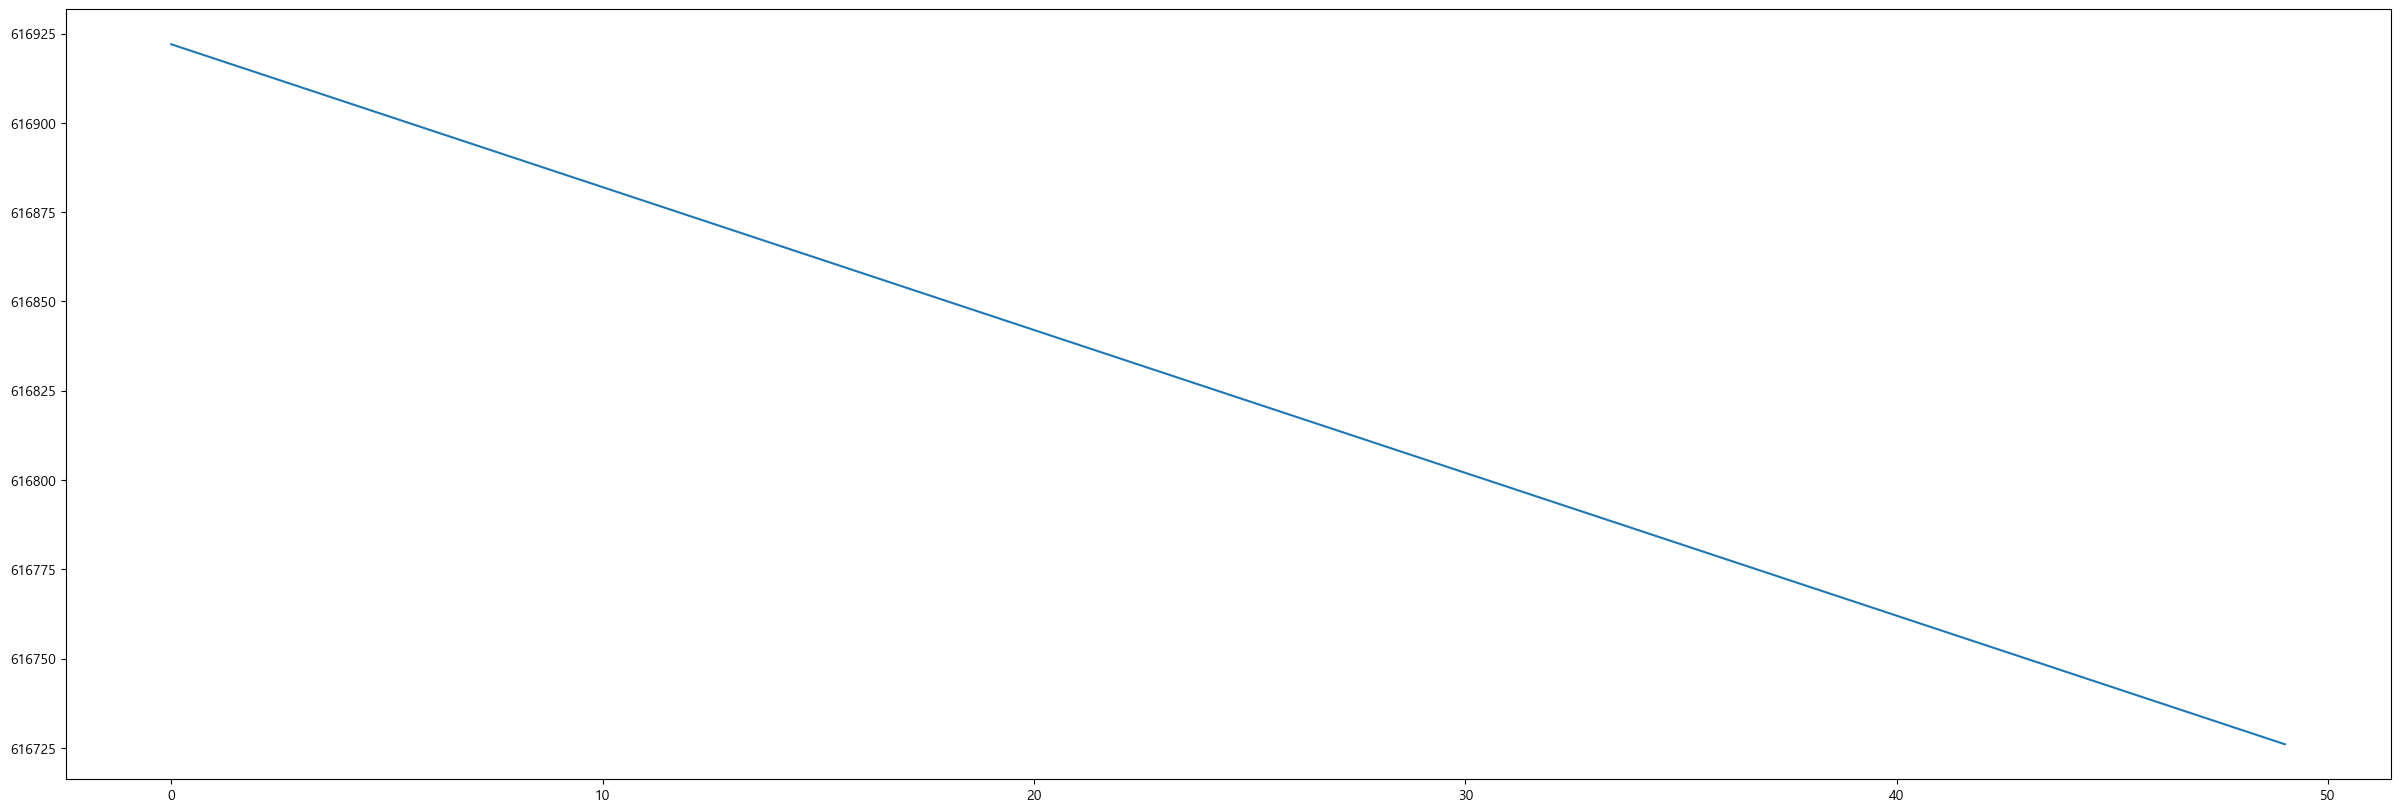

In [ ]:
x2 = df_pb_2.iloc[:, list(range(7, 15))+ [16, -3]]
y2 = df_pb_2.iloc[:, -2]

plt.figure(figsize=(30,10))
plt.plot(range(len(x2[:50])), y2[:50]) #true
plt.plot(range(len(x2[:50])), xgb.predict(y2)[:50], linestyle='--') #predict
plt.title('test')
plt.grid()

In [ ]:
df_ttf[df_ttf['time']==3907064]

,time,TTF_FlowCool Pressure Dropped Below Limit,TTF_Flowcool Pressure Too High Check Flowcool Pump,TTF_Flowcool leak
131032,3907064,4.0,8523240.0,9284.0


In [ ]:
df_ttf.iloc[131028:131035]

,time,TTF_FlowCool Pressure Dropped Below Limit,TTF_Flowcool Pressure Too High Check Flowcool Pump,TTF_Flowcool leak
131028,3907048,20.0,8523256.0,9300.0
131029,3907052,16.0,8523252.0,9296.0
131030,3907056,12.0,8523248.0,9292.0
131031,3907060,8.0,8523244.0,9288.0
131032,3907064,4.0,8523240.0,9284.0
131033,3907068,0.0,8523236.0,9280.0
131034,3907072,7998.0,8523232.0,9276.0


In [ ]:
pd.concat([df_train, df_ttf], axis=1)

,time,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,time,TTF_FlowCool Pressure Dropped Below Limit,TTF_Flowcool Pressure Too High Check Flowcool Pump,TTF_Flowcool leak
0,3283834.0,01M02,1.0,9253.0,10511673.0,67.0,1.0,-0.079428,-0.958814,-0.959509,...,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785,3283834,623234.0,9146470.0,632514.0
1,3283838.0,01M02,1.0,9253.0,10511673.0,67.0,1.0,-0.079419,-0.958928,-0.959651,...,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785,3283838,623230.0,9146466.0,632510.0
2,3283842.0,01M02,1.0,9253.0,10511673.0,67.0,1.0,-0.079409,-0.959156,-0.960006,...,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785,3283842,623226.0,9146462.0,632506.0
3,3283846.0,01M02,1.0,9253.0,10511673.0,67.0,1.0,-0.079420,-0.958928,-0.959297,...,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785,3283846,623222.0,9146458.0,632502.0
4,3283850.0,01M02,1.0,9253.0,10511673.0,67.0,1.0,-0.079430,-0.959269,-0.959438,...,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785,3283850,623218.0,9146454.0,632498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5110537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,39789824,NaN,NaN,NaN
5110538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,39789828,NaN,NaN,NaN
5110539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,39789832,NaN,NaN,NaN
5110540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,39789836,NaN,NaN,NaN


----
# train + ttf + fault

In [9]:
temp = pd.merge(left = df_train, right=df_ttf, left_on='time', right_on='time')
temp = temp.dropna(subset=df_ttf.columns[1:])

In [10]:
df_pl = pd.merge(left = df_train, right=df_ttf.iloc[:,[0, 1]], left_on='time', right_on='time')
df_pl = df_pl.dropna(subset=df_ttf.columns[1])

df_pl['fault'] = 0 #정상
idx = df_pl[df_pl[df_ttf.columns[1]] == 0]['fault'].index
df_pl.loc[idx, 'fault'] = 1 #이상

df_pl

,time,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,TTF_FlowCool Pressure Dropped Below Limit,fault
0,3283834,01M02,1,9253,10511673,67,1,-0.079428,-0.958814,-0.959509,...,2.027848,-0.013207,-0.122437,0.0,2.395370,2.871511,3.175941,4.037785,623234.0,0
1,3283838,01M02,1,9253,10511673,67,1,-0.079419,-0.958928,-0.959651,...,2.027848,-0.013207,-0.122437,0.0,2.395370,2.871511,3.175941,4.037785,623230.0,0
2,3283842,01M02,1,9253,10511673,67,1,-0.079409,-0.959156,-0.960006,...,2.027848,-0.013207,-0.122437,0.0,2.395370,2.871511,3.175941,4.037785,623226.0,0
3,3283846,01M02,1,9253,10511673,67,1,-0.079420,-0.958928,-0.959297,...,2.027848,-0.013207,-0.122437,0.0,2.395370,2.871511,3.175941,4.037785,623222.0,0
4,3283850,01M02,1,9253,10511673,67,1,-0.079430,-0.959269,-0.959438,...,2.027848,-0.013207,-0.122437,0.0,2.395370,2.871511,3.175941,4.037785,623218.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4637947,36797136,01M02,143,9652,12645359,69,1,-0.079442,-0.958814,-0.959226,...,-0.646442,-0.013207,-0.122437,0.0,0.988432,1.288380,1.530079,-0.604941,16.0,0
4637948,36797140,01M02,143,9652,12645359,69,1,-0.079452,-0.958530,-0.959297,...,-0.646442,-0.013207,-0.122437,0.0,0.988432,1.288380,1.530079,-0.604941,12.0,0
4637949,36797144,01M02,143,9652,12645359,69,1,-0.079461,-0.958644,-0.959651,...,-0.646442,-0.013207,-0.122437,0.0,0.988432,1.288380,1.530079,-0.604941,8.0,0
4637950,36797148,01M02,143,9652,12645359,69,1,-0.079461,-0.958644,-0.959438,...,-0.646442,-0.013207,-0.122437,0.0,0.988432,1.288380,1.530079,-0.604941,4.0,0


In [18]:
df_ph = pd.merge(left = df_train, right=df_ttf.iloc[:,[0, 2]], left_on='time', right_on='time')
df_ph = df_ph.dropna(subset=df_ttf.columns[2])

df_ph['fault'] = 0 #정상
idx = df_ph[df_ph[df_ttf.columns[2]] == 0]['fault'].index
df_ph.loc[idx, 'fault'] = 1 #이상

df_ph

,time,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,TTF_Flowcool Pressure Too High Check Flowcool Pump,fault
0,3283834,01M02,1,9253,10511673,67,1,-0.079428,-0.958814,-0.959509,...,2.027848,-0.013207,-0.122437,0.0,2.395370,2.871511,3.175941,4.037785,9146470.0,0
1,3283838,01M02,1,9253,10511673,67,1,-0.079419,-0.958928,-0.959651,...,2.027848,-0.013207,-0.122437,0.0,2.395370,2.871511,3.175941,4.037785,9146466.0,0
2,3283842,01M02,1,9253,10511673,67,1,-0.079409,-0.959156,-0.960006,...,2.027848,-0.013207,-0.122437,0.0,2.395370,2.871511,3.175941,4.037785,9146462.0,0
3,3283846,01M02,1,9253,10511673,67,1,-0.079420,-0.958928,-0.959297,...,2.027848,-0.013207,-0.122437,0.0,2.395370,2.871511,3.175941,4.037785,9146458.0,0
4,3283850,01M02,1,9253,10511673,67,1,-0.079430,-0.959269,-0.959438,...,2.027848,-0.013207,-0.122437,0.0,2.395370,2.871511,3.175941,4.037785,9146454.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772784,31427334,01M02,1,9643,12310888,67,33,0.031457,0.711411,1.370556,...,1.359276,-0.013207,-0.122455,0.0,-1.522929,-1.512464,-1.381748,0.021044,16.0,0
3772785,31427338,01M02,1,9643,12310888,67,33,0.031457,0.710898,1.373038,...,1.359276,-0.013207,-0.122455,0.0,-1.522925,-1.512460,-1.381744,0.021044,12.0,0
3772786,31427342,01M02,1,9643,12310888,67,33,0.031457,0.711126,1.373749,...,1.359276,-0.013207,-0.122455,0.0,-1.522922,-1.512459,-1.381742,0.021044,8.0,0
3772787,31427346,01M02,1,9643,12310888,67,33,0.031457,0.710387,1.379778,...,1.359276,-0.013207,-0.122455,0.0,-1.522919,-1.512455,-1.381738,0.021044,4.0,0


In [19]:
df_fl = pd.merge(left = df_train, right=df_ttf.iloc[:,[0, 3]], left_on='time', right_on='time')
df_fl = df_fl.dropna(subset=df_ttf.columns[3])

df_fl['fault'] = 0 #정상
idx = df_fl[df_fl[df_ttf.columns[3]] == 0]['fault'].index
df_fl.loc[idx, 'fault'] = 1 #이상

df_fl

,time,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,TTF_Flowcool leak,fault
0,3283834,01M02,1,9253,10511673,67,1,-0.079428,-0.958814,-0.959509,...,2.027848,-0.013207,-0.122437,0.0,2.395370,2.871511,3.175941,4.037785,632514.0,0
1,3283838,01M02,1,9253,10511673,67,1,-0.079419,-0.958928,-0.959651,...,2.027848,-0.013207,-0.122437,0.0,2.395370,2.871511,3.175941,4.037785,632510.0,0
2,3283842,01M02,1,9253,10511673,67,1,-0.079409,-0.959156,-0.960006,...,2.027848,-0.013207,-0.122437,0.0,2.395370,2.871511,3.175941,4.037785,632506.0,0
3,3283846,01M02,1,9253,10511673,67,1,-0.079420,-0.958928,-0.959297,...,2.027848,-0.013207,-0.122437,0.0,2.395370,2.871511,3.175941,4.037785,632502.0,0
4,3283850,01M02,1,9253,10511673,67,1,-0.079430,-0.959269,-0.959438,...,2.027848,-0.013207,-0.122437,0.0,2.395370,2.871511,3.175941,4.037785,632498.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4633718,36767388,01M02,1,9746,12643526,67,25,-0.079188,-0.958871,-0.959297,...,-0.980728,-0.013207,9.597747,0.0,0.973152,1.271277,1.512299,-0.657107,18.0,0
4633719,36767392,01M02,1,9746,12643526,67,25,-0.079236,-0.958871,-0.959226,...,-0.980728,-0.013207,9.597747,0.0,0.973152,1.271277,1.512299,-0.657107,14.0,0
4633720,36767396,01M02,1,9746,12643526,67,26,-0.079256,-0.958701,-0.959226,...,-0.980728,-0.013207,9.597747,3.0,0.973152,1.271277,1.512299,-0.657107,10.0,0
4633721,36767400,01M02,1,9746,12643526,67,26,-0.079276,-0.958928,-0.959580,...,-0.980728,-0.013207,9.597747,3.0,0.973152,1.271277,1.512299,-0.657107,6.0,0


In [11]:
for val, val2 in zip(df_ttf.columns[1:], ['pb', 'ph', 'fl']):
    temp = pd.merge(left = df_train, right=df_ttf.loc[:,['time', val]], left_on='time', right_on='time')
    temp = temp.dropna(subset=val)

    temp['fault'] = 0 #정상
    idx = temp[temp[val] == 0]['fault'].index
    temp.loc[idx, 'fault'] = 1 #이상

    globals()['df_{}'.format(val2)] = temp.copy()
    
    globals()['df_{}'.format(val2)].to_csv('./data/data_all_{}.csv'.format(val2))
    print(temp.shape)

(4637952, 26)
(3772789, 26)
(4633723, 26)


# 상관분석

In [12]:
df_pl_corr = df_pl.iloc[:, 7:25]
df_pl_corr = df_pl_corr[df_pl_corr.columns.difference(['FIXTURESHUTTERPOSITION'])]
df_pl_corr

,ACTUALROTATIONANGLE,ACTUALSTEPDURATION,ETCHAUX2SOURCETIMER,ETCHAUXSOURCETIMER,ETCHBEAMCURRENT,ETCHBEAMVOLTAGE,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,ETCHSOURCEUSAGE,ETCHSUPPRESSORCURRENT,ETCHSUPPRESSORVOLTAGE,FIXTURETILTANGLE,FLOWCOOLFLOWRATE,FLOWCOOLPRESSURE,IONGAUGEPRESSURE,ROTATIONSPEED,TTF_FlowCool Pressure Dropped Below Limit
0,-0.122437,4.037785,3.175941,2.871511,-0.959509,-0.958814,-1.751661,-2.783162,2.395370,-0.939043,-0.946194,2.027848,-2.842907,-2.332807,-0.079428,-0.013207,623234.0
1,-0.122437,4.037785,3.175941,2.871511,-0.959651,-0.958928,-1.743905,-2.780884,2.395370,-0.939043,-0.946103,2.027848,-2.842907,-2.332807,-0.079419,-0.013207,623230.0
2,-0.122437,4.037785,3.175941,2.871511,-0.960006,-0.959156,-1.743905,-2.780884,2.395370,-0.939043,-0.946057,2.027848,-2.841850,-2.332807,-0.079409,-0.013207,623226.0
3,-0.122437,4.037785,3.175941,2.871511,-0.959297,-0.958928,-1.747158,-2.780884,2.395370,-0.939043,-0.946148,2.027848,-2.841850,-2.332807,-0.079420,-0.013207,623222.0
4,-0.122437,4.037785,3.175941,2.871511,-0.959438,-0.959269,-1.747158,-2.784389,2.395370,-0.939043,-0.946057,2.027848,-2.841850,-2.332807,-0.079430,-0.013207,623218.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4637947,-0.122437,-0.604941,1.530079,1.288380,-0.959226,-0.958814,-1.753413,-2.791223,0.988432,-0.939043,-0.945873,-0.646442,-2.839887,-2.018013,-0.079442,-0.013207,16.0
4637948,-0.122437,-0.604941,1.530079,1.288380,-0.959297,-0.958530,-1.742404,-2.791223,0.988432,-0.939043,-0.946332,-0.646442,-2.839887,-2.029585,-0.079452,-0.013207,12.0
4637949,-0.122437,-0.604941,1.530079,1.288380,-0.959651,-0.958644,-1.742404,-2.791223,0.988432,-0.939043,-0.946424,-0.646442,-2.842907,-2.039228,-0.079461,-0.013207,8.0
4637950,-0.122437,-0.604941,1.530079,1.288380,-0.959438,-0.958644,-1.747158,-2.789997,0.988432,-0.939043,-0.946424,-0.646442,-2.842907,-2.053372,-0.079461,-0.013207,4.0


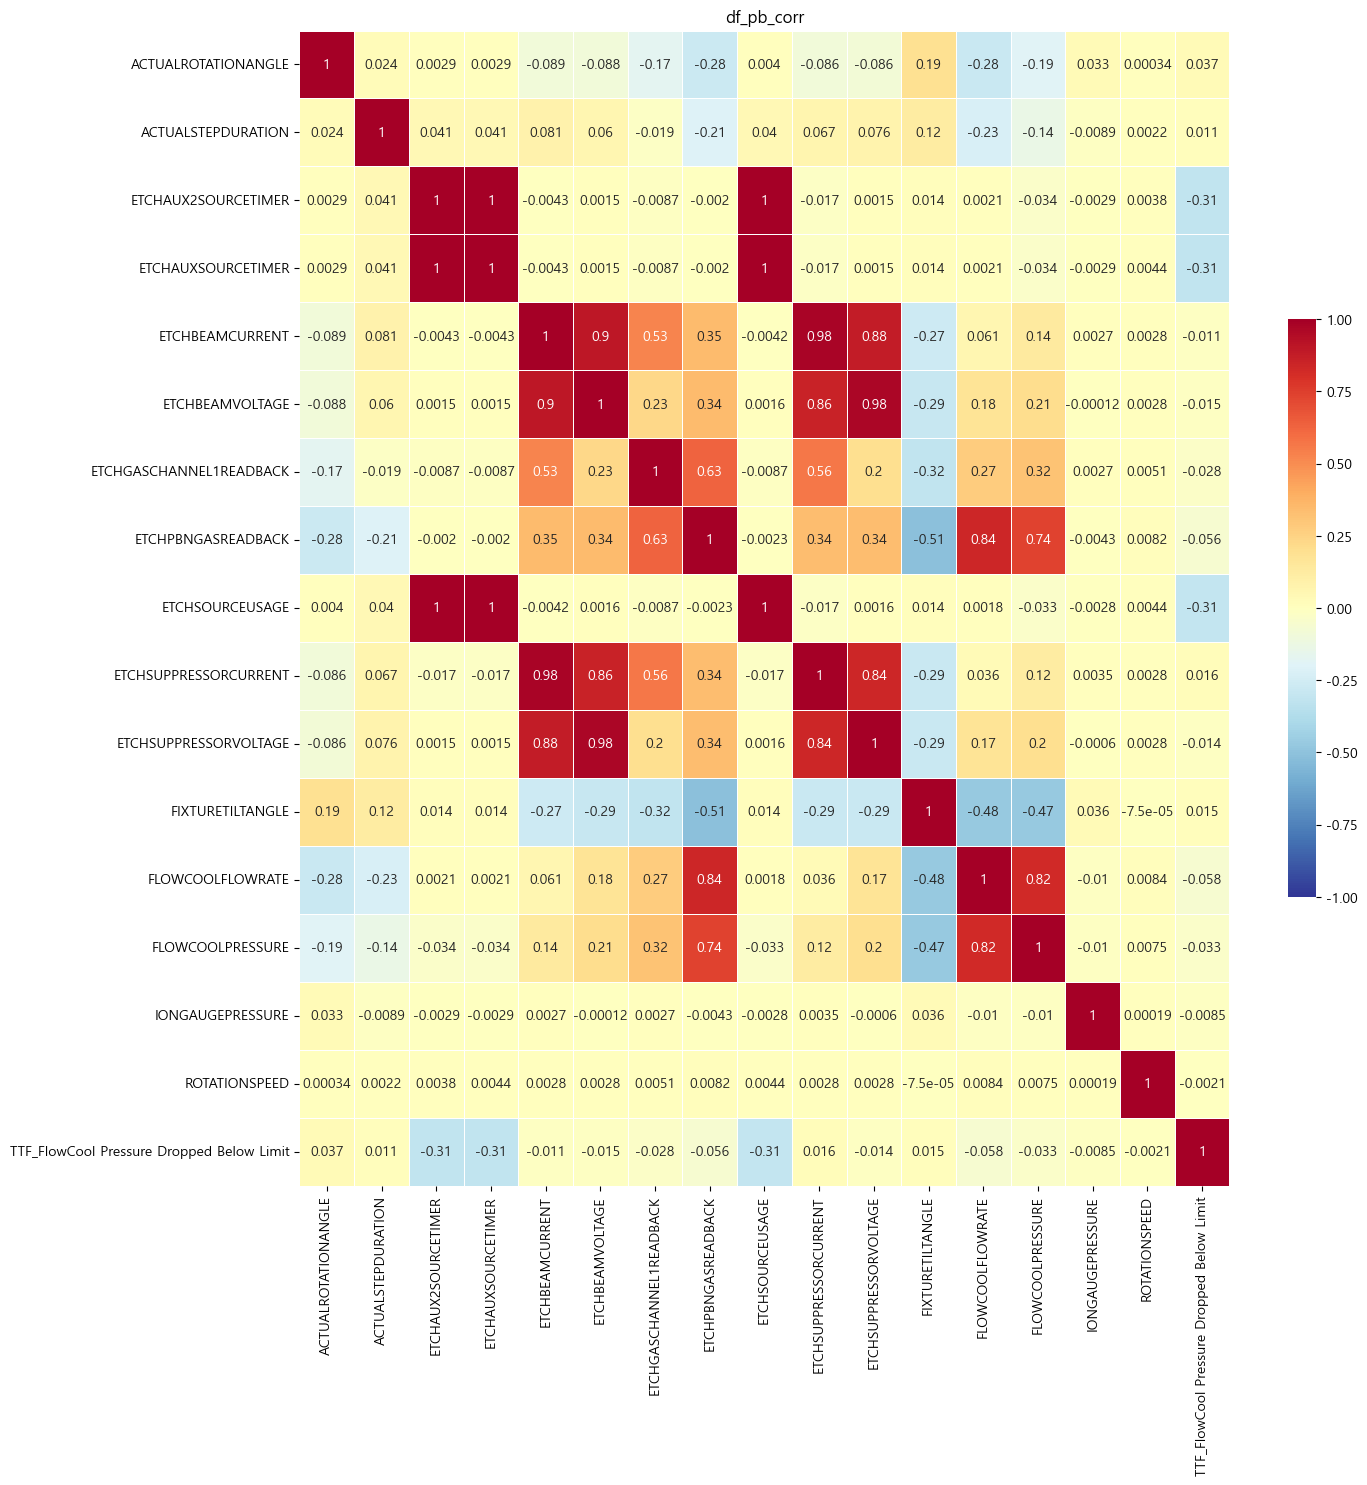

In [13]:
aa = df_pl_corr.corr()

# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(15,15) )

# 히트맵을 그린다
sns.heatmap(aa, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.title('df_pb_corr')
plt.show()

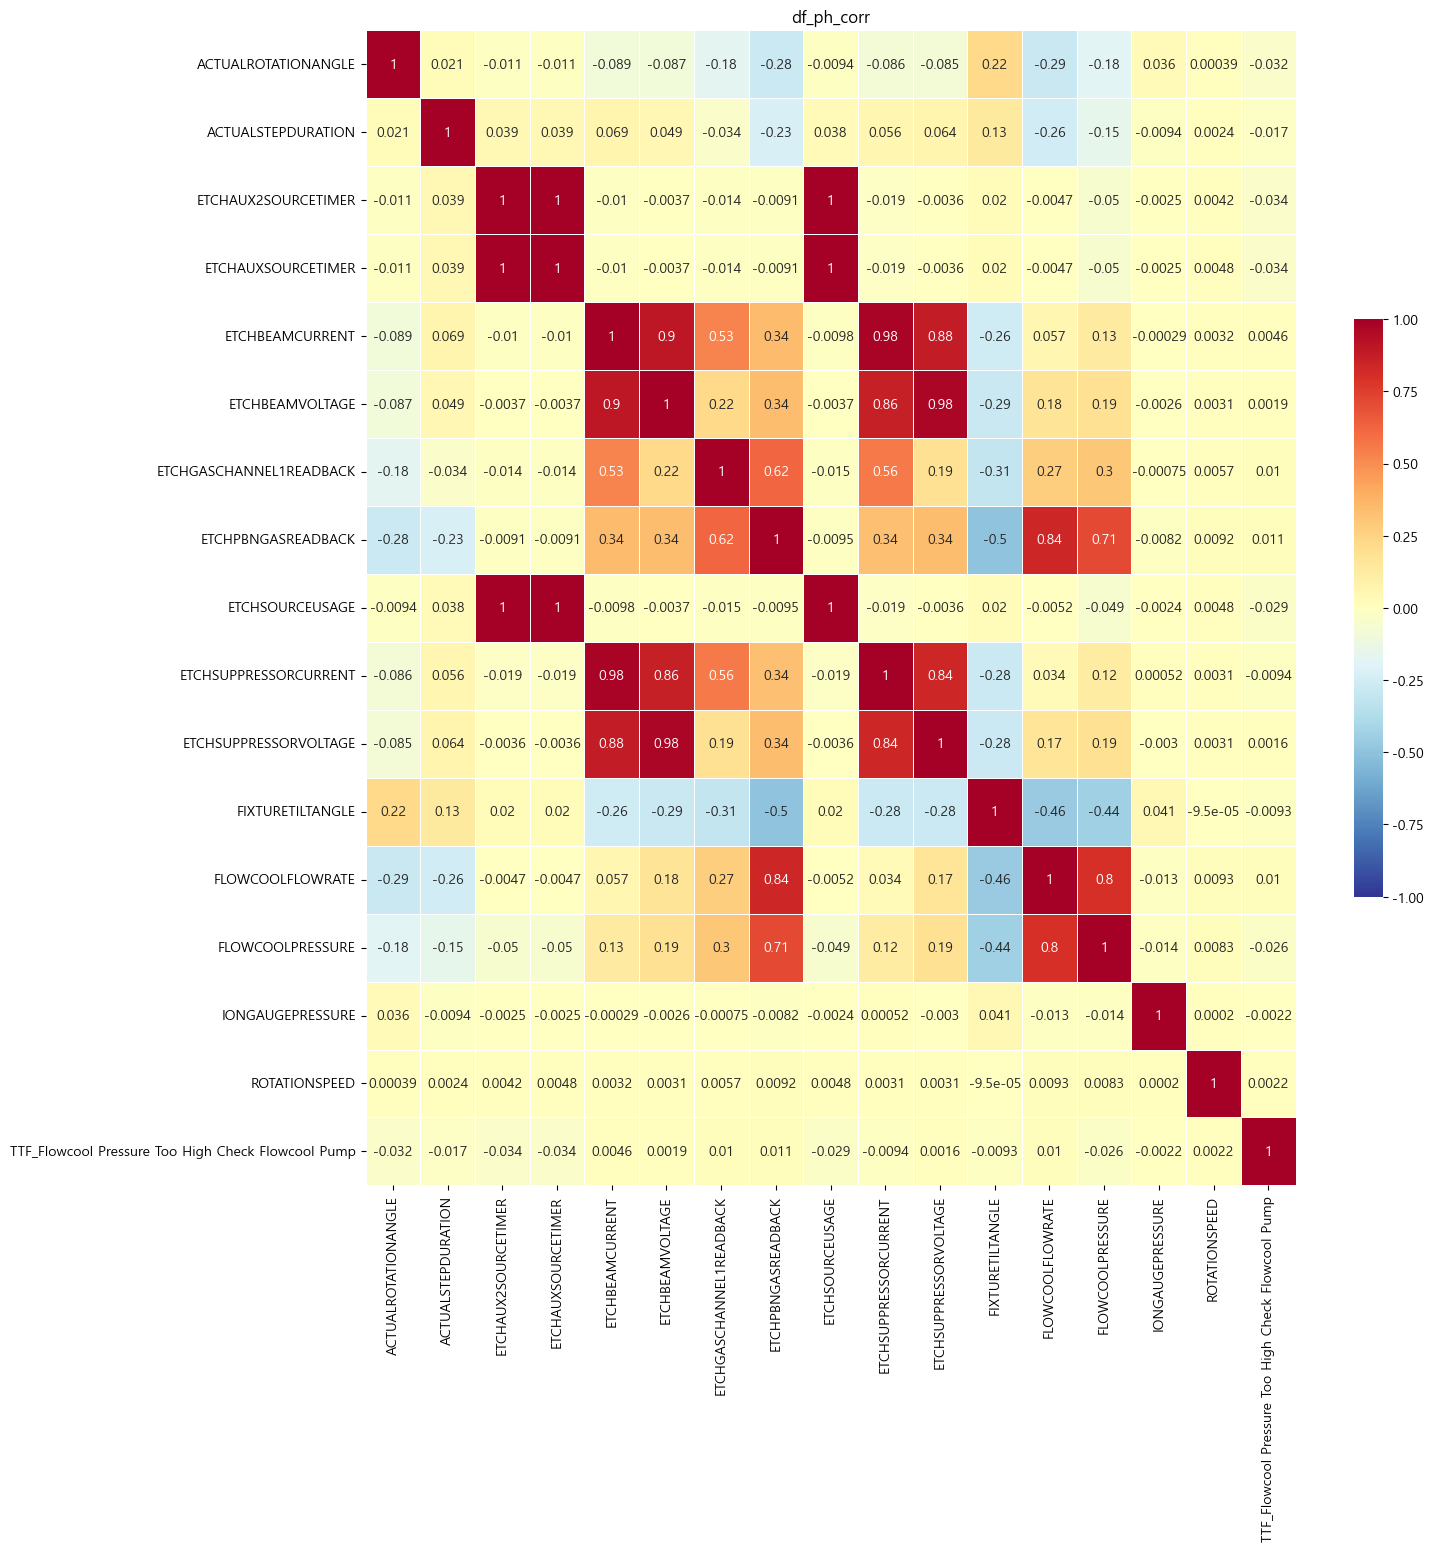

In [14]:
df_ph_corr = df_ph.iloc[:, 7:25]
df_ph_corr = df_ph_corr[df_ph_corr.columns.difference(['FIXTURESHUTTERPOSITION'])]
df_ph_corr

aa = df_ph_corr.corr()

# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(15,15) )

# 히트맵을 그린다
sns.heatmap(aa, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           ) 
plt.title('df_ph_corr')
plt.show()

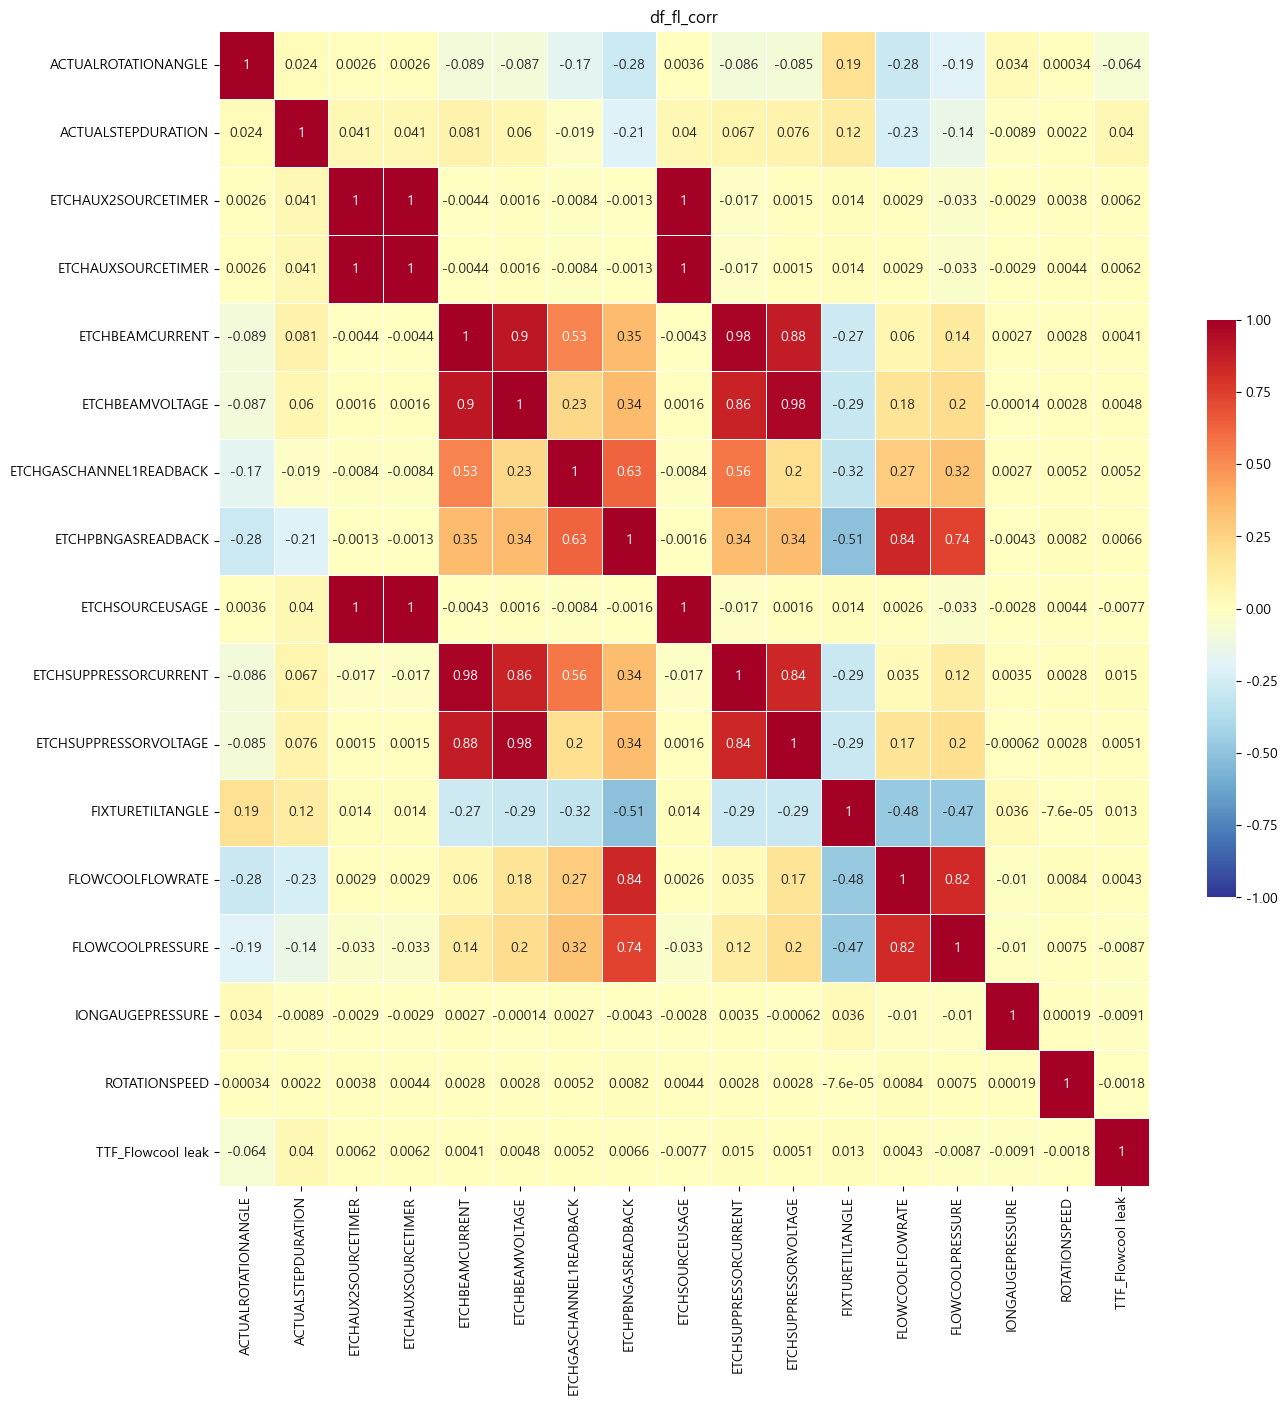

In [15]:
df_fl_corr = df_fl.iloc[:, 7:25]
df_fl_corr = df_fl_corr[df_fl_corr.columns.difference(['FIXTURESHUTTERPOSITION'])]
df_fl_corr

aa = df_fl_corr.corr()

# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(15,15) )

# 히트맵을 그린다
sns.heatmap(aa, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           ) 
plt.title('df_fl_corr')
plt.show()

In [38]:
df_pb.columns

Index(['time', 'Tool', 'stage', 'Lot', 'runnum', 'recipe', 'recipe_step',
       'IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT',
       'ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT', 'FLOWCOOLFLOWRATE',
       'FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK',
       'FIXTURETILTANGLE', 'ROTATIONSPEED', 'ACTUALROTATIONANGLE',
       'FIXTURESHUTTERPOSITION', 'ETCHSOURCEUSAGE', 'ETCHAUXSOURCETIMER',
       'ETCHAUX2SOURCETIMER', 'ACTUALSTEPDURATION',
       'TTF_FlowCool Pressure Dropped Below Limit', 'fault'],
      dtype='object')

In [36]:
col1 = ['ETCHAUX2SOURCETIMER', 'ETCHAUXSOURCETIMER'] #1
col2 = ['ETCHSUPPRESSORVOLTAGE']+['ETCHSUPPRESSORCURRENT', 'ETCHBEAMVOLTAGE'] #0.9 #'ETCHBEAMCURRENT'
col3 = ['ETCHSUPPRESSORVOLTAGE', 'FLOWCOOLFLOWRATE'] #0.85 #'FLOWCOOLPRESSURE'

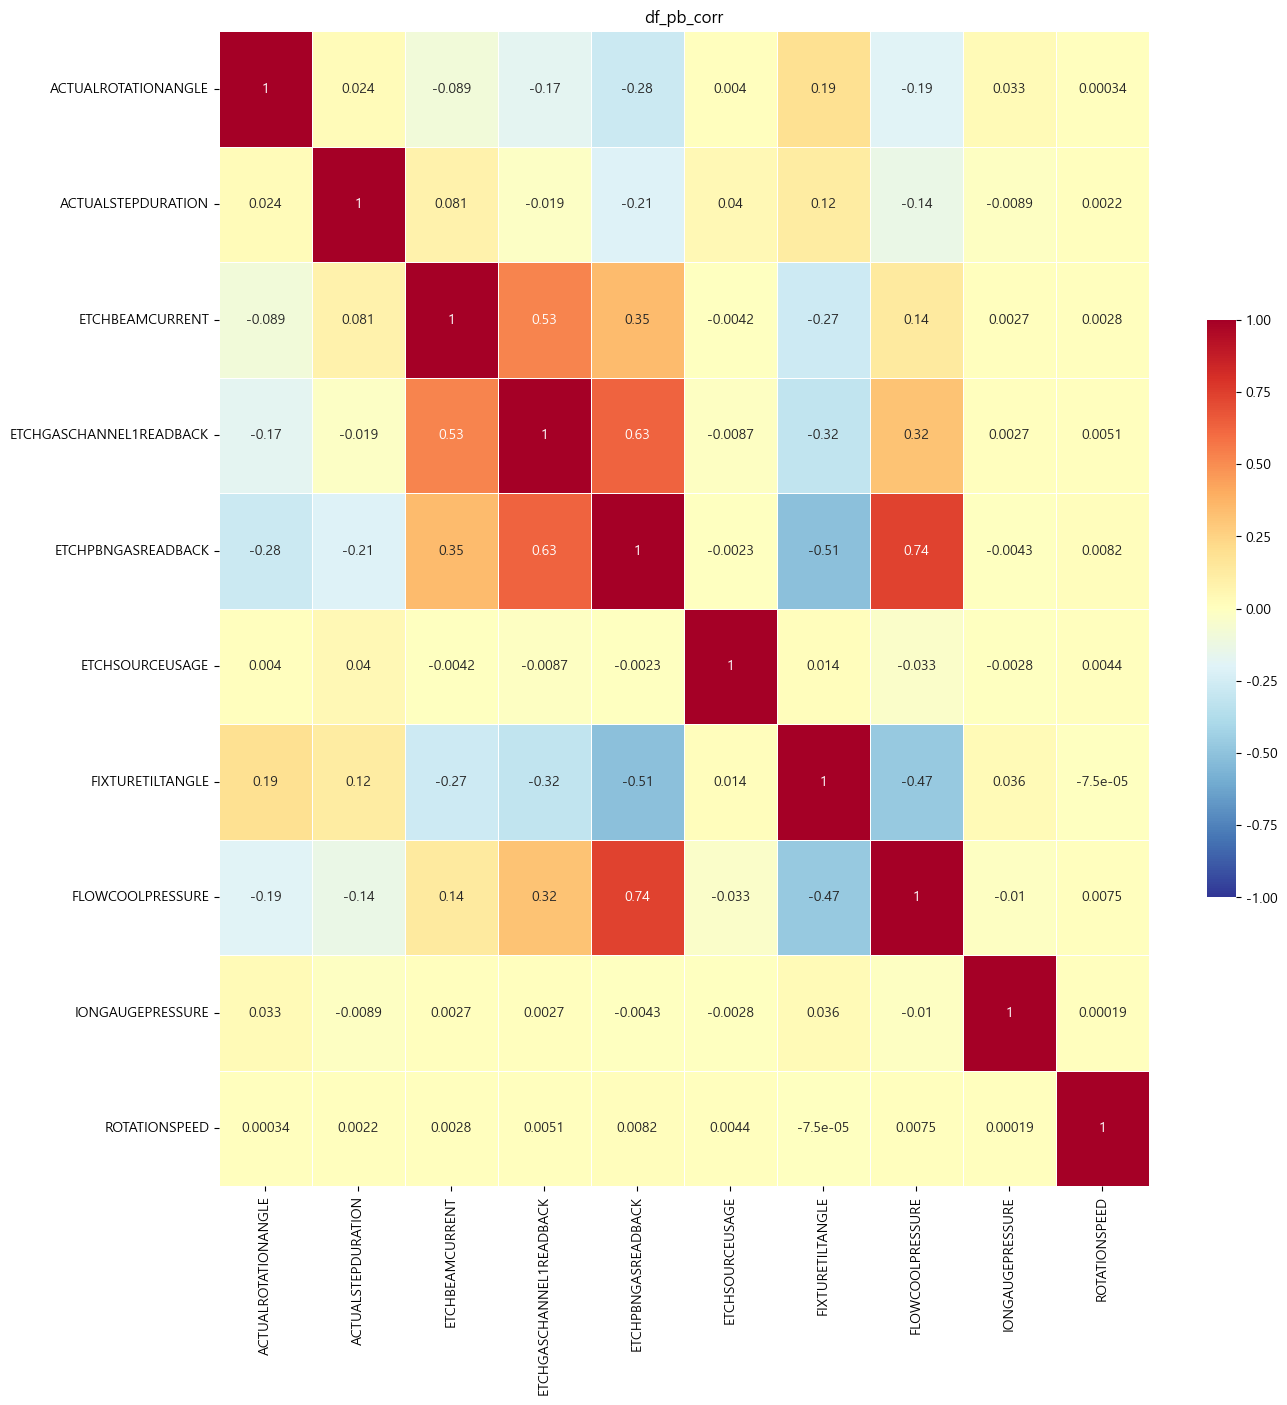

In [39]:
df_pb_corr = df_pb.iloc[:, 7:25]
df_pb_corr = df_pb_corr[df_pb_corr.columns.difference(['FIXTURESHUTTERPOSITION', 'TTF_FlowCool Pressure Dropped Below Limit'])]
df_pb_corr = df_pb_corr[df_pb_corr.columns.difference(col1+col2+col3)]

aa = df_pb_corr.corr()

# aa = aa[aa >=0.75]


# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(15,15) )

# 히트맵을 그린다
sns.heatmap(aa, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           ) 
plt.title('df_pb_corr')
plt.show()